# 1. **PERKENALAN**

Team 6 :

*   Ida Nur Laela (PYTN-KS11-013)
*   Satrio Muhammad F R (PYTN-KS11-016)
*   Rizka Latifatul H (PYTN-KS11-018)

## **Latar Belakang**

Prakiraan cuaca menjadi sangat penting bagi manusia karena cuaca memainkan peran yang sangat penting dalam kehidupan sehari-hari. Manusia sangat bergantung pada kondisi cuaca untuk berbagai aktivitas mereka. Faktor alam seperti suhu, kelembaban, tekanan udara, dan kecepatan angin dapat mempengaruhi cuaca. Salah satu fenomena cuaca yang signifikan adalah hujan, yang memiliki dampak besar pada kehidupan manusia. Oleh karena itu, diperlukan analisis dan model yang dapat memprediksi kemungkinan hujan agar manusia dapat mengatur aktivitas mereka dengan lebih efektif.

## **Dataset**

Dataset yang digunakan adalah dataset yang berjudul Rain in Australia yang berasal diambil dari website kaggle https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Dataset ini berisi tentang histori cuaca harian selama 10 tahun dari berbagai lokasi di Australia yang terdiri dari 145460 baris dan 23 atribut. 

## **Objektif**

Final Project 2 ini dibuat guna mengevaluasi konsep sebagai berikut:
* Mampu memahami konsep Classification dengan Logistic Regression dan SVM
* Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
* Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# **Import pustaka yang dibutuhkan**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [334]:
# Import library preprocessing dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import library modelling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

# **DATA LOADING**

In [335]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [336]:
# Melihat dimensi dataset
df.shape

(145460, 23)

In [337]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## **Informasi yang didapat dari data**

*   145460 rows
*   23 columns
*   7 columns we have object
*   16 columns we have folat
*   Tipe data "Date" perlu dikonversi ke datetime/dilakukan ekstraksi
*   Tipe data untuk kolom lain selain "Date" terlihat sudah sesuai




# **DATA CLEANING**

In [226]:
df.describe() #cek deskripsi data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Analisis
1. Rata-rata minimum temperature adalah 12.194 and rata-rata 2. maximum temperature adalah 23.221 derajat Celcius.
3. Rata-rata rainfall adalah 2.36 mm.
4. Rata-rata sunshine recieved adalah 7.61 hour.
5. Rata-rata wind gust speed adalah 40.035 km/hr.
6. Temperature minimum yang dicatat adalah -8.5 derajat 7. 7. Celcius and temperature maksimum yang dicatat adalah 48.1 derajat Celcius.
8. Rainfall minimum yang tercatat pada hari-hari tertentu adalah 0 mm and maksimumnya adalah 371 mm.
9. Median dari evaporation adalah 4.8 mm.

In [238]:
df.describe(include= "object")  # cek deskripsi data termasuk objek

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [239]:
# Melihat nilai null pada dataset
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Analisis

1. Nilai null maksimum ada di kolom Sunshine diikuti oleh Evaporasi.
2. Lebih dari 55.000 nilai null ada di kolom Cloud9am dan Cloud3pm.
3. Sekitar 15.000 nilai nol ada di kolom Pressure9am dan Pressure3pm.
4. Lebih dari 10.000 nilai nol ada di kolom WindGustDir, WindGustSpeed, dan WindDir9am
5. Ada banyak kolom yang memiliki lebih dari 1000 catatan nol.

In [338]:
# Drop Sunshine, Evaporation, Cloud9am and Cloud3pm karena kebanyakan nilainya null

col = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']
df.drop(col, axis=1, inplace=True)
df = df.dropna(how='any')
print(df.shape)

(112925, 19)


**Pisahkan Fitur (Kolom) Categorical dan Numerical**

In [241]:
# Memeriksa fitur categorical dan hitung jumlahnya

cat_features = [columns_name for columns_name in df.columns if df[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))

Number of Categorical Features we have in data is : 7  
Here is Listed features ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [242]:
# Memeriksa fitur numerical dan hitung jumlahnya 

num_features = [columns_name for columns_name in df.columns if df[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))

Number of Numerical Features we have in data is : 12  
Here is the Listed Numerical features ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'] 


**Cek Kardinalitas**

*   Jumlah unique value dalam kardinalitas
*   Jika ada banyak unique value maka sulit untuk melakukan pengkodean label
*   Juga berpengaruh pada efisiensi model

In [243]:
for i  in cat_features:
  count = len(df[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

#karena nilai unique value dalam kolom Date sangat besar, maka Cardinal data tinggi yang akan membuat beberapa permasalahan

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column RainToday : 3 
The Cardinality of each column RainTomorrow : 3 


**Menangani Masalah Kardinalitas**

In [349]:
# Convert tanggal menjadi format Date, kemudian ambil 'Month' karena tanggal dan tahun tidak bisa digunakan untuk prediksi karena nilai selalu berubah
df["Date"] = pd.to_datetime(df["Date"])      
df["Month"] = df["Date"].dt.month  

In [245]:
df.head()  # kolomnya di paling akhir

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


In [350]:
# Hapus kolom 'Date' karena sudah tidak berguna

df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12
1,0,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12
2,0,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12
3,0,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12
4,0,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12


**Menangani Missing Value (Categorical Variables)**

In [247]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype =="O"]

In [248]:
categorical_features  # 'Date' sudah tidak masuk ke categorical feature lagi.

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [249]:
missing_cat = df[categorical_features].isnull().sum() # Total missing values 
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


<BarContainer object of 6 artists>

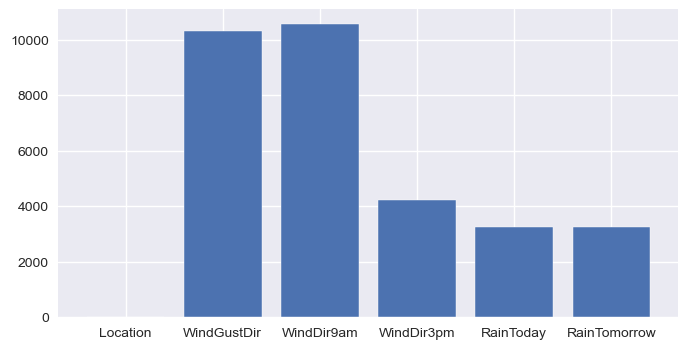

In [250]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values ) # dari visualisasi, winDir3pm punya banyak missing value 

In [251]:
#  Ganti missing value untuk categorical features dengan mode dari setiap kolom.
cat_features_with_null = [features for features in categorical_features if df[features].isnull().sum()] 
for each_feature in cat_features_with_null:
  df[each_feature] = df[each_feature].fillna(df[each_feature].mode()[0])    

In [252]:
df[categorical_features].isnull().sum()  # tidak ada missing value lagi

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

**Menangani Missing Value (Numerical)**

In [253]:
# List kolom yang memiliki numerical value
num_col = [num_col for num_col in df.columns if df[num_col].dtype !="O"] 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

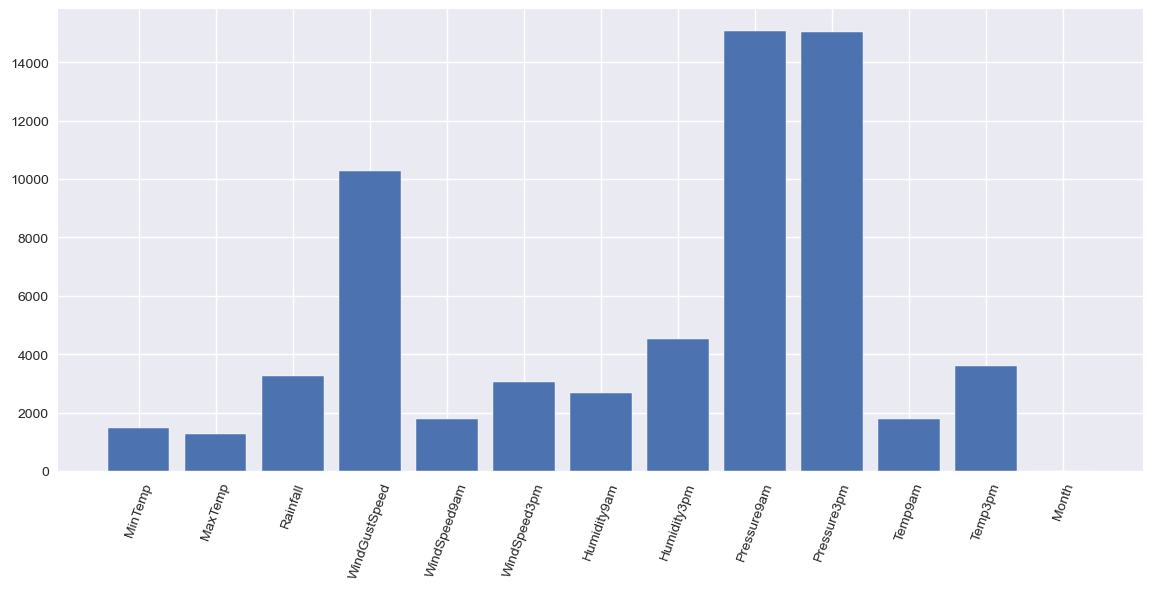

In [254]:
plt.style.use('seaborn')
missing_num = df[num_col].isnull().sum()    # hitung missing values di setiap list, yang disimpan di num_feature 
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)

In [255]:
num_col_with_null_values = [col for col in num_col if df[col].isnull().sum()]
missing_values = df[num_col_with_null_values].isnull().sum()
missing_values

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
dtype: int64

<AxesSubplot:>

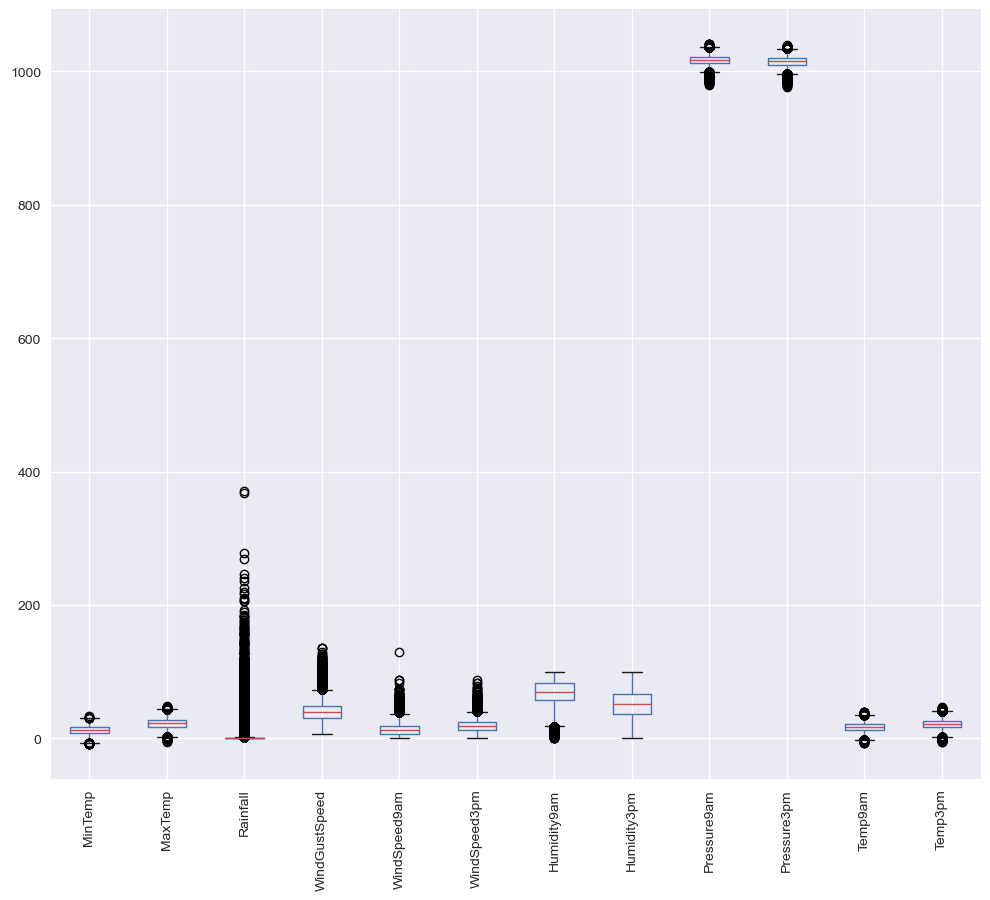

In [256]:
# Kita tidak bisa langsung mengganti missing value dengan mean karena ada kemungkinan outliers di data
# cek terlebih dahulu dengan box plot.
plt.figure(figsize=(12,10))
df.boxplot(num_col_with_null_values,rot = 90)

Ada banyak outliers terutama di fitur Rainfall, dan fitur yang lainnya.

**Menangani Outliers untuk Numerical Atribut**

In [257]:
# Menghapus outlier dengan membatasi menggunakan nilai (q1 dan q3).

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  df.loc[df[feature]<lower_limit, feature] = lower_limit
  df.loc[df[feature]>upper_limit, feature] = upper_limit

<AxesSubplot:>

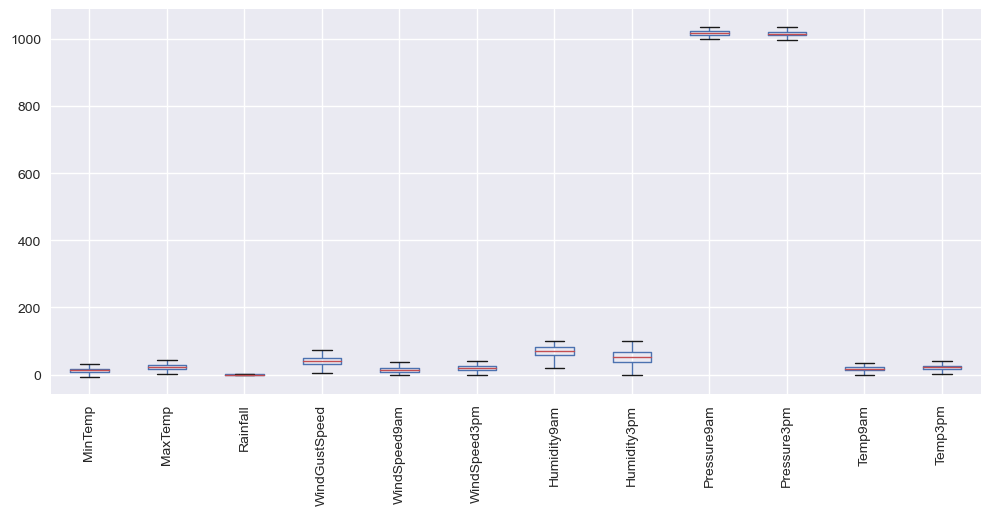

In [258]:
plt.figure(figsize=(12,5))
df.boxplot(num_col_with_null_values,rot = 90)    # kita bisa lihat tidak ada outlier lagi

In [259]:
# Setelah mengahapus outlier, ganti missing value dengan mean dari kolom tersebut
for features in num_col_with_null_values:
  df[features] = df[features].fillna(df[features].mean())   

In [260]:
# Tidak ada missing value/null value 
df[num_col_with_null_values].isnull().sum()  

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

# **EDA : EXPLORASI DATA ANALYSIS**

**Distribusi Lokasi**

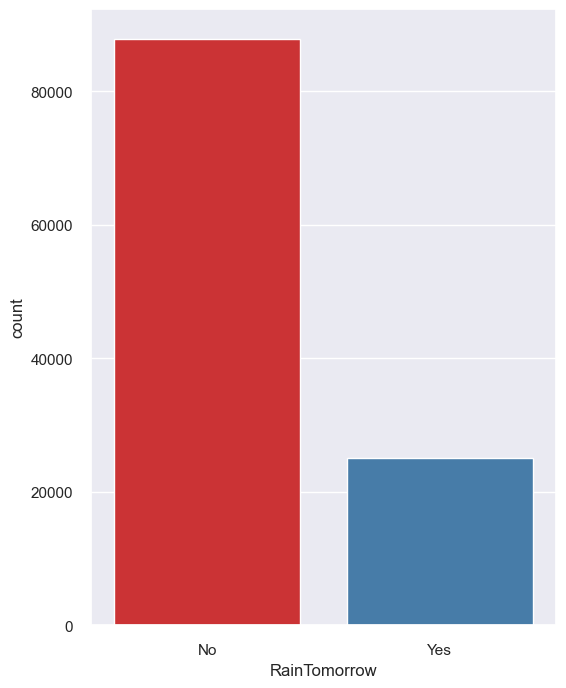

In [339]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

Berdasarkan bar chart, prediksi bahwa hari besok tidak terjadi hujan lebih banyak dibandingkan prediksi bahwa hari besok terjadi hujan.

<AxesSubplot:>

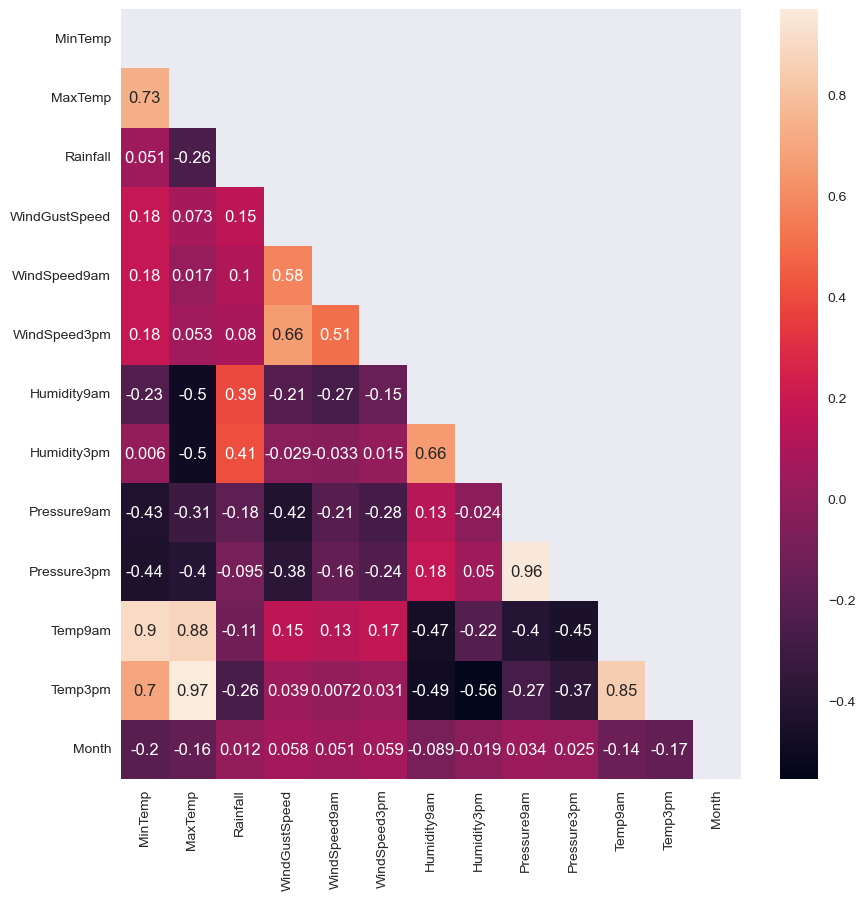

In [262]:
# plot heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, mask=np.triu(df.corr()))

Berdasarkan heatmap, terjadi korelasi positif yang kuat antara variabel MaxTemp & Temp3pm, antara variabel Pressure9am & Pressure 3pm, dan antara variabel MinTemp & Temp9an. Sedangkan korelasi negatif sedang terjadi antara variabel Humidity3pm & Temp3pm, antara variabel MaxTemp & Humidity9am, dan antara variabel Humidity9am & Temp3pm.

**Summary Info and Stats**

In [134]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,12.664721,23.655670,2.377892,40.786611,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,6.431499
std,6.254135,6.982702,8.602968,13.321774,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,3.476314
min,-8.200000,2.600000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,1.000000
25%,8.100000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,3.000000
50%,12.400000,23.100000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,6.000000
75%,17.200000,28.700000,0.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,9.000000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,12.000000


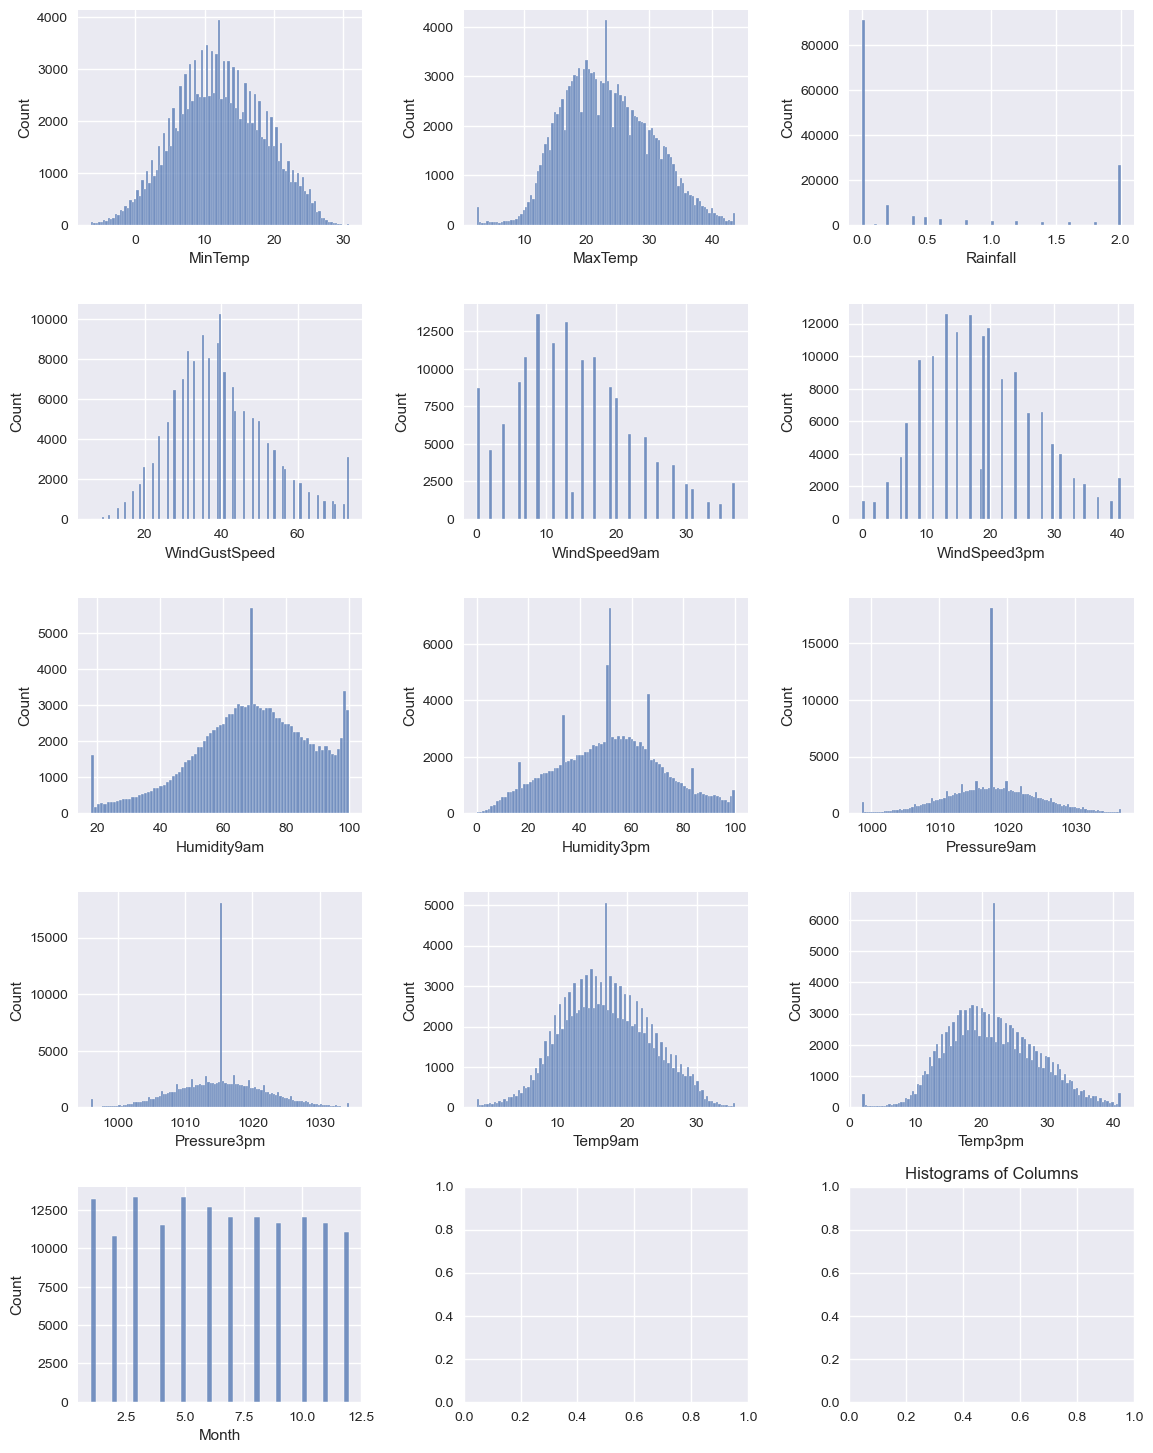

In [263]:
# Untuk melihat histogram dari kolom numerical. 
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object ]

for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])
    if (i == 20):
      break;

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns');

Analisis


*   Sebagian besar fitur terdistribusi secara normal seperti yang diharapkan.
*   Distribusi Sunshine menarik tetapi sebagian besar dapat dijelaskan
*   Frekuensi tinggi nilai 0 mewakili hari-hari di mana mendung sepanjang hari
*   Penurunan frekuensi yang tiba-tiba setelah sekitar 11 jam merupakan cerminan dari terbatasnya jumlah hari dalam setahun di mana cahaya padam selama berjam-jam atau lebih lama
*   Distribusi Humidity9am sangat menarik karena lonjakan frekuensi yang besar
*   Konsentrasi titik tertinggi untuk MinTemp adalah antara 10 hingga 12 derajat Celcius
*   Konsentrasi titik tertinggi untuk MaxTemp adalah antara 18 hingga 22 derajat Celcius
*   Kecepatan WindGustSpeed berkisar dari 0 hingga hampir 140 km/jam. Konsentrasi tertinggi adalah antara 38-40 km/jam
*   Kecepatan angin maksimum pada pukul 09.00 (WindSpeed9am) berkisar antara 10 hingga 20 km/jam sedangkan pada pukul 15.00 berkisar antara 15 hingga 22 km/jam
*   Konsentrasi titik tertinggi untuk kelembapan pada pukul 09.00 (Humidity9am) adalah antara 60-80% sedangkan pada pukul 15.00 adalah 40-70%
*   Konsentrasi titik tertinggi untuk tekanan pada pukul 09:00 (Pressure9am) adalah antara 1015-1018 hpa dan pada pukul 15:00 antara 1015-1017 hpa
*   Suhu maksimum pada jam 9 pagi (Temp9am) adalah antara 16-18 derajat Celcius dan pada jam 3 sore antara 21-23 derajat Celcius

## **Distribusi Feature MinTemp**

<AxesSubplot:xlabel='MinTemp'>

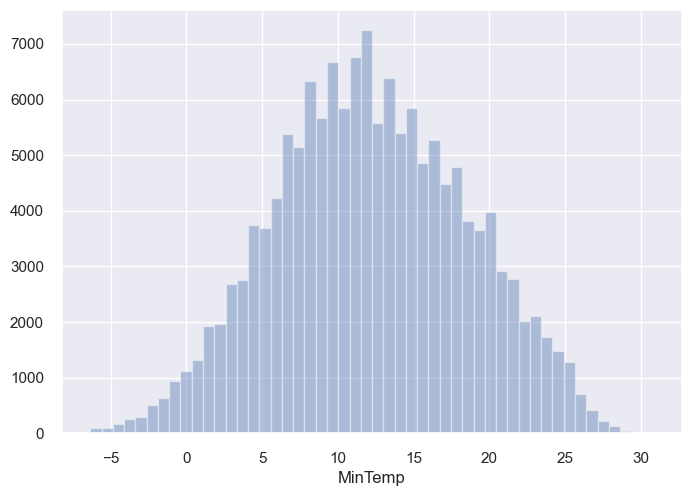

In [264]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False)

Rata - rata dari MinTemp di Australia ada diantara 8 dan 12 deraja

## **Distribusi Feature MaxTemp**

<AxesSubplot:xlabel='MaxTemp'>

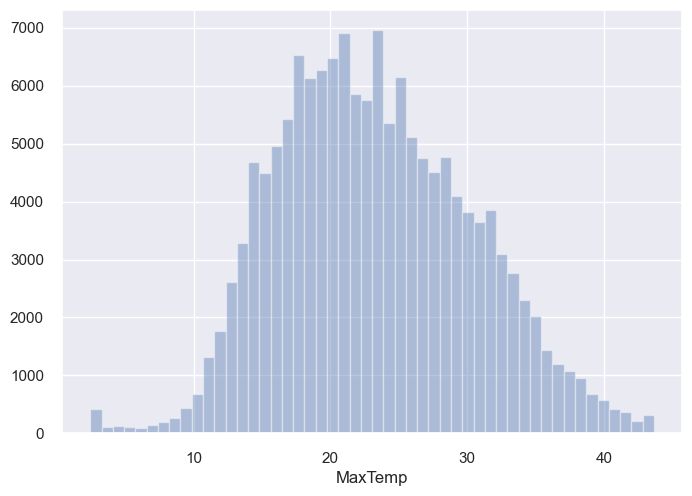

In [265]:
sns.set(color_codes = True)
sns.distplot(df.MaxTemp, kde = False)

In [266]:
# Variance
print('Variance dari Kolom MaxTemp = ', df['MaxTemp'].var(ddof=1))

Variance dari Kolom MaxTemp =  49.98188178413633


In [267]:
# Standard Deviation
print('Standard Deviation dari Kolom MaxTemp = ', df['MaxTemp'].var(ddof=1)**0.5)

Standard Deviation dari Kolom MaxTemp =  7.06978654445354


In [268]:
# Percentiles
df['MaxTemp'].describe()

count    145460.000000
mean         23.224781
std           7.069787
min           2.450000
25%          18.000000
50%          22.700000
75%          28.200000
max          43.650000
Name: MaxTemp, dtype: float64

Analisis

*   Nilai standard deviation/variance menunjukkan seberapa tersebar data yang diolah.
*   Nilai percentiles menunjukkan pada rentang 75%, 50%, 25% berapa nilai data.



## **Korelasi Antara MinTemp dan MaxTemp**

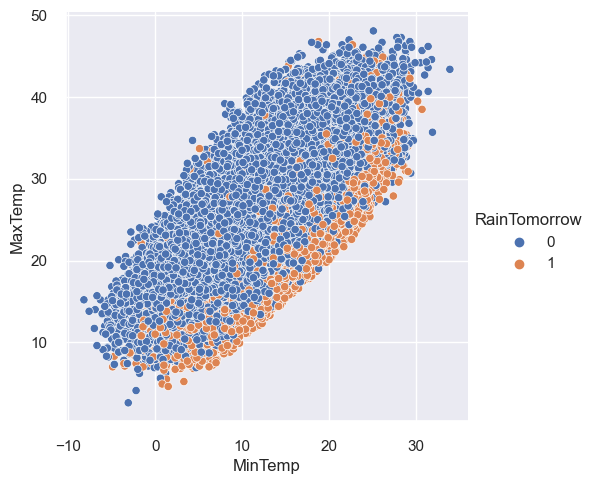

In [351]:
sns.relplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = df)
plt.show()

Pada temperatur tinggi, rata - rata tidak terjadi hujan pada keesokan harinya. Temperatur mempengaruhi target.

## **Distribusi Data yang Bertipe Data Numerik**

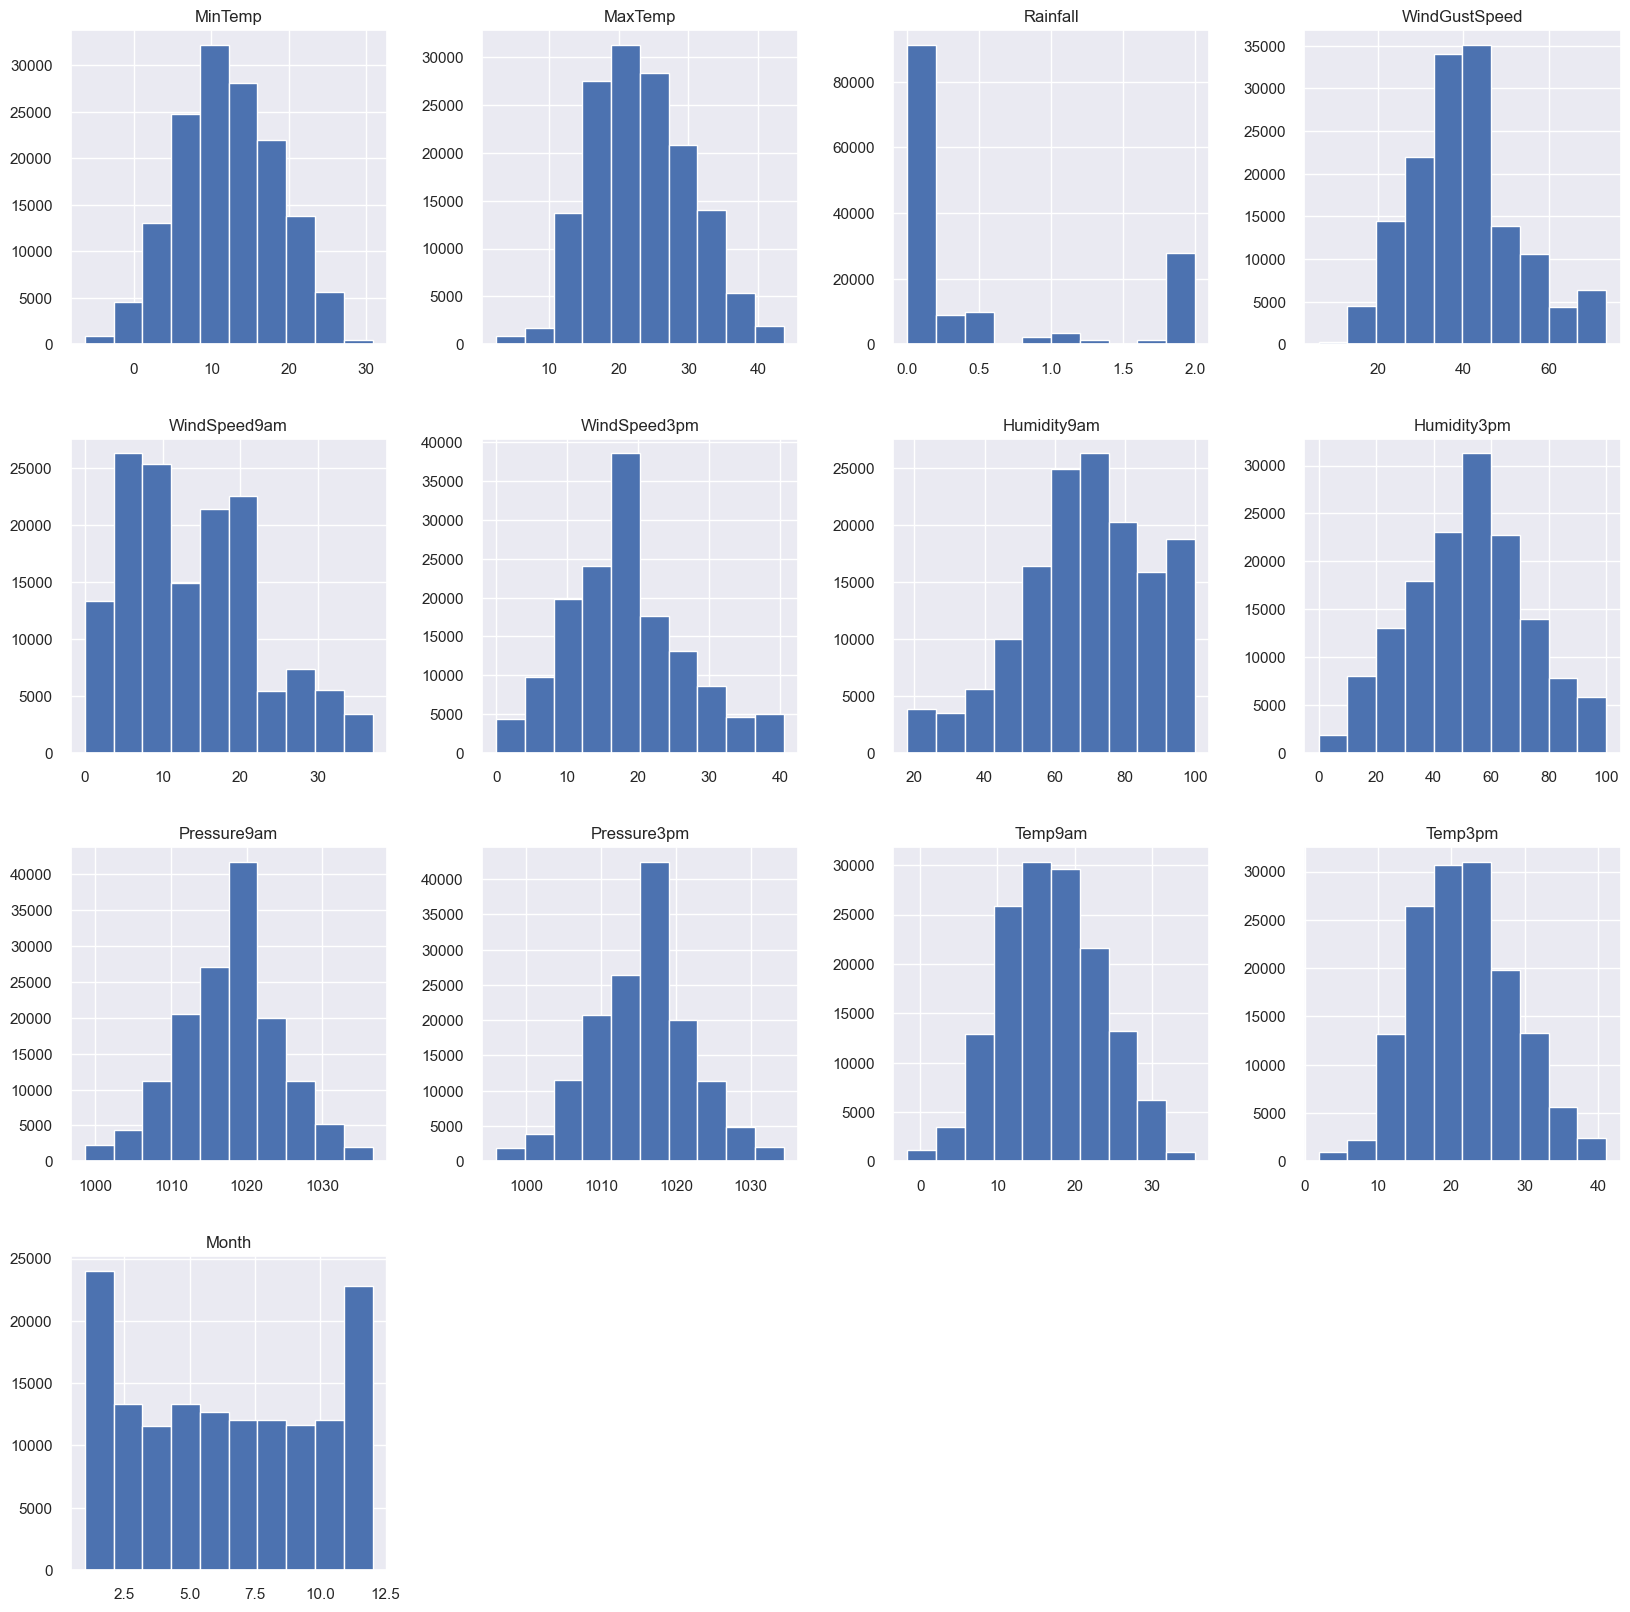

In [50]:
df.hist(figsize=(20, 20)) 
plt.show()

# **DATA PREPROCESSING**

In [340]:
# Memperbarui list atribut bertipe numerik dan kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']
numerical = [i for i in df.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
numerical : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [341]:
# Mengganti No (0) dan Yes (1) pada kolom RainToday dan RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

## **Encoding Data Columns**

In [342]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [343]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [344]:
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'SSW': 8, 'N': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [345]:
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [346]:
df['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'NorahHead': 5, 'NorfolkIsland': 6, 'Richmond': 7, 'Sydney': 8, 'SydneyAirport': 9, 'WaggaWagga': 10, 'Williamtown': 11, 'Wollongong': 12, 'Canberra': 13, 'Tuggeranong': 14, 'Ballarat': 15, 'Bendigo': 16, 'Sale': 17, 'MelbourneAirport': 18, 'Melbourne': 19, 'Mildura': 20, 'Nhil': 21, 'Portland': 22, 'Watsonia': 23, 'Dartmoor': 24, 'Brisbane': 25, 'Cairns': 26, 'GoldCoast': 27, 'Townsville': 28, 'Adelaide': 29, 'MountGambier': 30, 'Nuriootpa': 31, 'Woomera': 32, 'Witchcliffe': 33, 'PearceRAAF': 34, 'PerthAirport': 35, 'Perth': 36, 'Walpole': 37, 'Hobart': 38, 'Launceston': 39, 'AliceSprings': 40, 'Darwin': 41, 'Katherine': 42, 'Uluru': 43}


In [353]:
# Categorical variables WindGustDir, WindDir3pm and WindDir9am pada dummy variables masing-masing kategori
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(df, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(112925, 64)


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_6,WindDir9am_7,WindDir9am_8,WindDir9am_9,WindDir9am_10,WindDir9am_11,WindDir9am_12,WindDir9am_13,WindDir9am_14,WindDir9am_15
0,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,0,0
1,0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,0
2,0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,0
3,0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,0,0,0,0,0,0,0,0,0


Dataset data final terdiri dari 112925 baris dan 64 kolom

In [354]:
# preprocessing MinMaxScaler
standa = preprocessing.MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_6,WindDir9am_7,WindDir9am_8,WindDir9am_9,WindDir9am_10,WindDir9am_11,WindDir9am_12,WindDir9am_13,WindDir9am_14,WindDir9am_15
0,0.0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
# correlation matrix
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

Var correlation < 0.5%                 RainTomorrow
WindGustDir_10      0.001759
WindGustDir_15      0.003007
WindDir3pm_1        0.002857
WindDir3pm_9        0.003230
WindDir9am_4        0.004053


Karena variabel-variabel diatas memiliki nilai korelasi < 0.5%, maka variabel-variabel tersebut dapat dihapus. Sehingga dataset data final terdiri dari 112925 baris dan 59 kolom.

In [356]:
# Mengahapus variables dengan correlation < 0.5%
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Data Final (112925, 59)


Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)

In [357]:
# split data train dan test
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [358]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (90340, 58)
Y train shape:  (90340,)
X test shape:  (22585, 58)
Y test shape:  (22585,)


Berdasarkan pembagian proporsi training data/data latih dan testing data/data uji, didapatkan jumlah data training dari keseluruhan data sebanyak 90340 data, serta data testing sebanyak 22585 data.

# **MODELING**

## **Logistic Regression**

In [359]:
# logistic regression
# mendefinisikan model
logreg = LogisticRegression(C=10)

# training model
logreg.fit(X_train, Y_train)

# predict target values
Y_predict1 = logreg.predict(X_test)

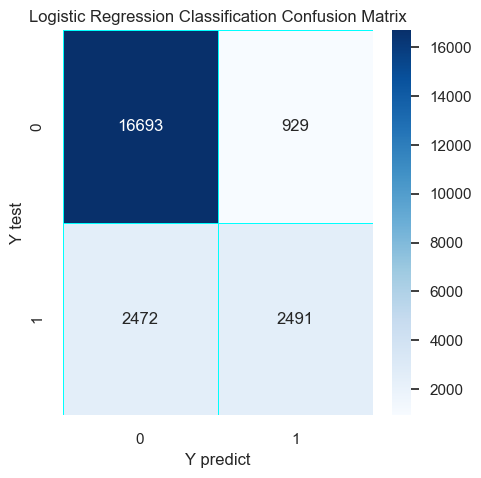

In [360]:
# confusion matrix
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt="d", ax=ax, cmap='Blues')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Berdasarkan Logistic Regression Confusion Matrix, diperoleh hasil sebagai berikut:

1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 16693.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 929.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 2472.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 2491.

In [361]:
# test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.84941332742971


In [362]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict1))
print(classification_report(Y_test, Y_predict1))

Accuracy Score: 0.84941332742971
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     17622
         1.0       0.73      0.50      0.59      4963

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



In [363]:
#Summary evaluasi model
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(Y_test, Y_predict1))
print('Presisi :', precision_score(Y_test, Y_predict1))
print('Recall :', recall_score(Y_test, Y_predict1))
print('F1 Score :', f1_score(Y_test, Y_predict1))

Ringkasan Evaluasi Model
Akurasi : 0.84941332742971
Presisi : 0.7283625730994152
Recall : 0.5019141648196656
F1 Score : 0.5942979840152689


Keterangan :
1. Nilai akurasi dari model logistic regression dan SVM tidak jauh berbeda, keduanya memiliki nilai akurasi sebesar 84% yang mana kedua hasil tersebut cukup baik untuk dilakukan prediksi hujan di Australia.
2. Nilai Akurasi, Recall model, dan F1 Score model logistic regression lebih unggul daripada model SVM sedangkan nilai presisi SVM lebih unggul daripada model logistic regression.

## **Support Vector Machine**

In [364]:
# mendefinisikan SVM model
svm = SVC()

# training model
svm.fit(X_train, Y_train)

# predict target values
Y_predict3 = svm.predict(X_test)

In [365]:
# confusion matriks
confusion_matrix(Y_test, Y_predict3)

array([[16957,   665],
       [ 2662,  2301]], dtype=int64)

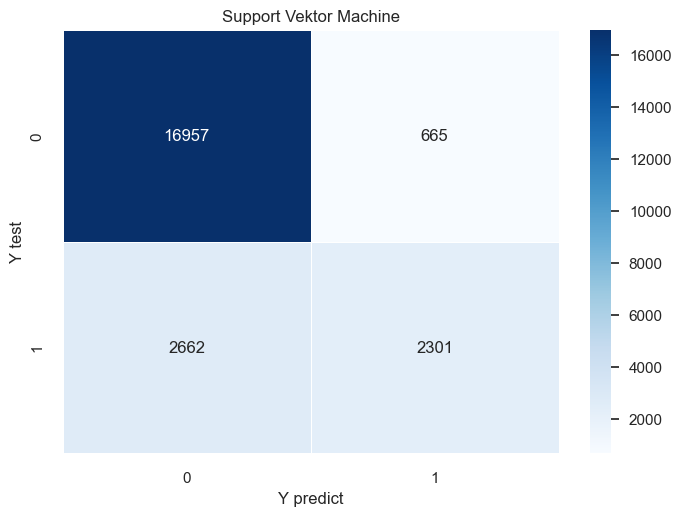

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     17622
         1.0       0.78      0.46      0.58      4963

    accuracy                           0.85     22585
   macro avg       0.82      0.71      0.75     22585
weighted avg       0.84      0.85      0.84     22585



In [368]:
cm_svm = confusion_matrix(Y_test, Y_predict3)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.title('Support Vektor Machine')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
print(classification_report(Y_test, Y_predict3))

Berdasarkan SVM Confusion Matrix, diperoleh hasil sebagai berikut:

1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 16957.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 665.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 2662.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 2301.

In [369]:
# test score
score_svmcla = svm.score(X_test, Y_test)
print(score_svmcla)

0.8526898383883108


In [370]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict3))
print(classification_report(Y_test, Y_predict3))

Accuracy Score: 0.8526898383883108
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     17622
         1.0       0.78      0.46      0.58      4963

    accuracy                           0.85     22585
   macro avg       0.82      0.71      0.75     22585
weighted avg       0.84      0.85      0.84     22585



In [406]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression Score', 
                        'Support Vector Machine Score'], 'Accuracy': [score_logreg, score_svmcla]})
model_ev

Accuracy_score = pd.Series([score_logreg, score_svmcla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score'])
print(Accuracy_score)

Logistic Regression Score       0.849413
Support Vector Machine Score    0.852690
dtype: float64


Hasil output menghasilkan nilai akurasi yang tinggi karena mengalami ketidakseimbangan maka prediksi kurang akurat.

# **Handling Imbalance Data**

Setelah dilakukan modelling ternyata akurasi data kurang tepat karena data mengalami ketidakseimbangan sehingga prediksi bahwa hari esok tidak terjadi hujan lebih banyak dibandingkan prediksi bahwa hari esok terjadi hujan. Oleh karena itu perlu adanya resampling data dan handling imbalance. Data resampling dan penanganan ketidakseimbangan data sangat penting dalam analisis data karena masalah ketidakseimbangan dapat mempengaruhi kualitas model dan hasil prediksi. Dengan melakukan resampling dan penanganan ketidakseimbangan data, kita dapat meningkatkan kemampuan model untuk mengenali dan memprediksi dengan baik di semua kelas, termasuk kelas minoritas.  

In [372]:
data_imbalance = datafinal

In [191]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [373]:
from sklearn.preprocessing import LabelEncoder

## **Encoding data dengan Label Encoder**

In [374]:
# Membuat dataframe baru
encode = LabelEncoder()
data_imbalance['Location'] = encode.fit_transform(data_imbalance['Location'].values)

In [375]:
# Memisahkan kolom target
x_imbalance = data_imbalance.drop(['RainTomorrow'],axis=1)
y_imbalance = data_imbalance['RainTomorrow']

In [376]:
# Mengecek ukuran data setelah di encode
print(x_imbalance.shape)
print(y_imbalance.shape)

(112925, 63)
(112925,)


## **Melakukan Over Sampling dengan SMOTE**

In [377]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=30)
x_imbalance_sampling, y_imbalance_sampling = sm.fit_resample(x_imbalance,y_imbalance)

In [378]:
print(x_imbalance_sampling.shape)
print(y_imbalance_sampling.shape)

(175812, 63)
(175812,)


Setelah melakukan oversampling dengan SMOTE, DataFrame "x_imbalance_sampling" memiliki dimensi (jumlah baris, jumlah kolom) sebesar (175812, 63), yang berarti terdapat 175812 baris dan 63 kolom fitur atau input pada pemodelan. 

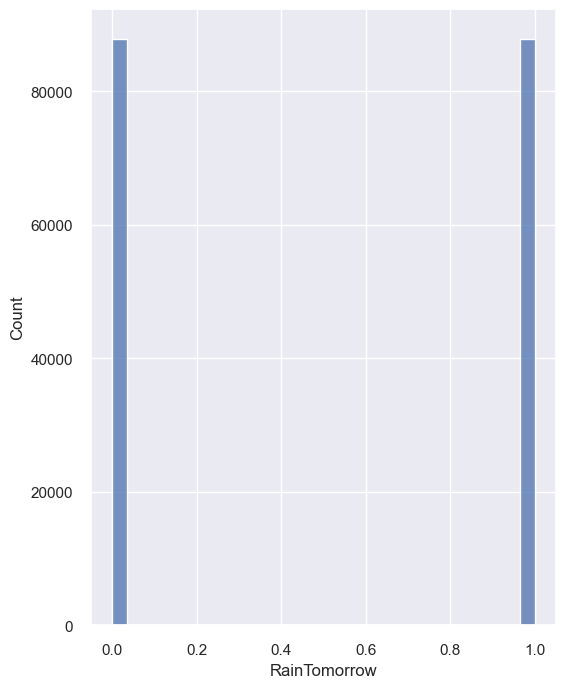

In [379]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.histplot( data=y_imbalance_sampling)
plt.show()

Perbandingan data setelah di oversampling terlihat sama dan tidak dominan salah satunya.

In [380]:
df_balanced = pd.concat([x_imbalance_sampling, y_imbalance_sampling], axis=1)
df_balanced['Location'] = encode.inverse_transform(df_balanced['Location'].values)
df_balanced.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_7,WindDir9am_8,WindDir9am_9,WindDir9am_10,WindDir9am_11,WindDir9am_12,WindDir9am_13,WindDir9am_14,WindDir9am_15,RainTomorrow
0,0.0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [381]:
df_balanced.shape

(175812, 64)

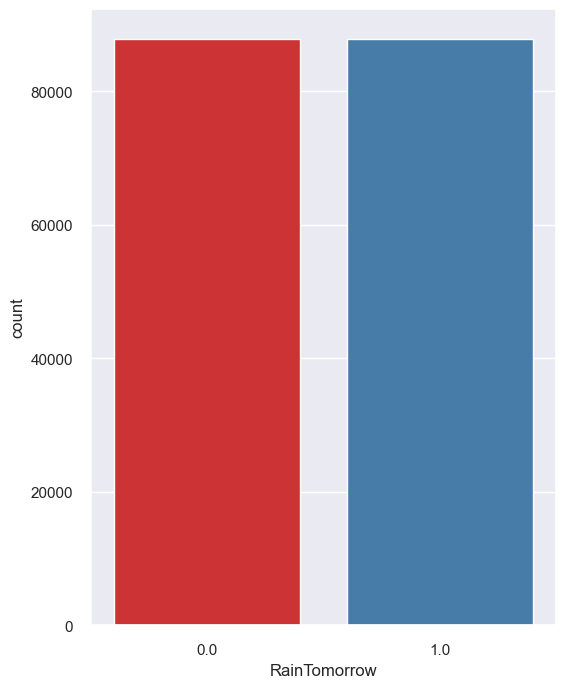

In [382]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df_balanced, palette="Set1")
plt.show()

Perbandingan data setelah di oversampling terlihat sama dan tidak dominan salah satunya.

# **Modelling After Hadling**

## **Logistic Regession**

* After handling imbalance

In [383]:
# Menentukan feature
X_weather_balanced = df_balanced.drop(['Location', 'RainTomorrow'], axis=1)
y_weather_balanced = df_balanced['RainTomorrow']

In [384]:
XWeather_balanced_train, XWeather_balanced_test, yWeather_balanced_train, yWeather_balanced_test = train_test_split(X_weather_balanced, y_weather_balanced, test_size=0.2, random_state=42)

In [385]:
model_weather_balanced = LogisticRegression(solver='liblinear', C=0.5, multi_class='ovr', random_state=42)

In [386]:
model_weather_balanced.fit(XWeather_balanced_train, yWeather_balanced_train)

LogisticRegression(C=0.5, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [387]:
yWeather_balanced_pred = model_weather_balanced.predict(XWeather_balanced_test)

In [388]:
print(f'Accuracy Score Weather Logistic Regression: {metrics.accuracy_score(yWeather_balanced_test, yWeather_balanced_pred)}')
print(f'Precision Weather Logistic Regression: {metrics.precision_score(yWeather_balanced_test, yWeather_balanced_pred)}')
print(f'Recall Weather Logistic Regression: {metrics.recall_score(yWeather_balanced_test, yWeather_balanced_pred)}')

Accuracy Score Weather Logistic Regression: 0.7969456531012712
Precision Weather Logistic Regression: 0.8057337726142998
Recall Weather Logistic Regression: 0.7867261132118065


In [389]:
cmatrix = confusion_matrix(yWeather_balanced_test, yWeather_balanced_pred)
cmatrix

array([[14083,  3361],
       [ 3779, 13940]], dtype=int64)

In [390]:
tn, fp, fn, tp = cmatrix.ravel()
print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 14083
False Positive : 3361
False Negative : 3779
True Positive  : 13940


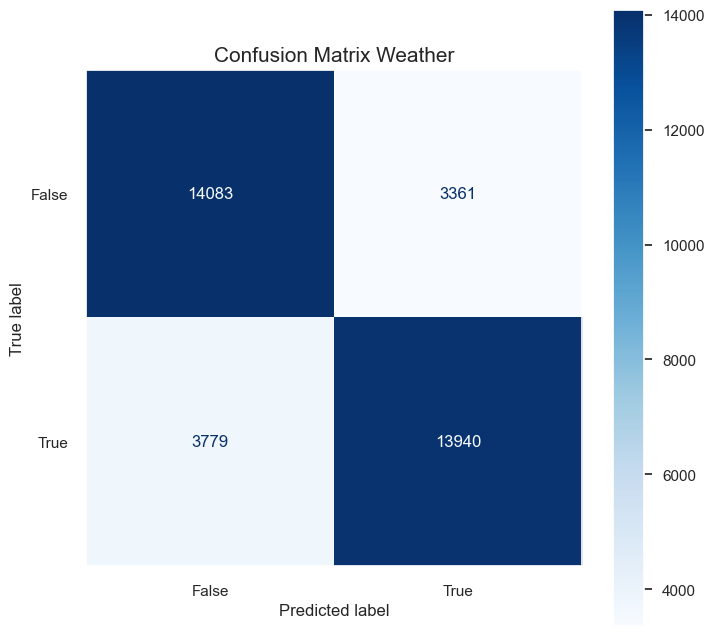

In [391]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cmatrix, display_labels = [False, True])
cm_display.plot(ax=ax, cmap='Blues')
ax.grid(False)
ax.set_title('Confusion Matrix Weather', size=15)

plt.show()

Berdasarkan Logistic Regression Confusion Matrix, diperoleh hasil sebagai berikut:

1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 14083.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 3361.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 3779.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 13940.

In [392]:
print(f'Classification Report:\n{classification_report(yWeather_balanced_test, yWeather_balanced_pred)}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80     17444
         1.0       0.81      0.79      0.80     17719

    accuracy                           0.80     35163
   macro avg       0.80      0.80      0.80     35163
weighted avg       0.80      0.80      0.80     35163



**Keterangan** : 
Sebelum dilakukan SMOTE, model memiliki recall yang rendah pada kelas minoritas sebesar 0.50. Namun, setelah dilakukan SMOTE, recall pada kelas minoritas meningkat menjadi 0.79, menunjukkan bahwa model menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar.

## **Support Vector Machine**

* After handling imbalance

In [393]:
# Menentukan feature
X_weather_balanced = df_balanced.drop(['Location', 'RainTomorrow'], axis=1)
y_weather_balanced = df_balanced['RainTomorrow']

In [394]:
# Split dataset
XWeather_balanced_train, XWeather_balanced_test, yWeather_balanced_train, yWeather_balanced_test = train_test_split(X_weather_balanced, y_weather_balanced, test_size=0.2, random_state=42)

In [397]:
svm_modelWeather_balanced = svm.SVC(kernel='linear')
svm_modelWeather_balanced.fit(XWeather_balanced_train, yWeather_balanced_train)

SVC(kernel='linear')

In [400]:
yWeather_balanced_svm_pred = svm_modelWeather_balanced.predict(XWeather_balanced_test)
print(f'Accuracy Score Weather_balanced SVM: {metrics.accuracy_score(yWeather_balanced_test, yWeather_balanced_svm_pred)}')
print(f'Precision Weather_balanced SVM: {metrics.precision_score(yWeather_balanced_test, yWeather_balanced_svm_pred)}')
print(f'Recall Weather_balanced SVM: {metrics.recall_score(yWeather_balanced_test, yWeather_balanced_svm_pred)}')

Accuracy Score Weather_balanced SVM: 0.7998179905013793
Precision Weather_balanced SVM: 0.8075682525054717
Recall Weather_balanced SVM: 0.7912974772842711


In [401]:
cmatrix = confusion_matrix(yWeather_balanced_test, yWeather_balanced_svm_pred)
cmatrix

array([[14103,  3341],
       [ 3698, 14021]], dtype=int64)

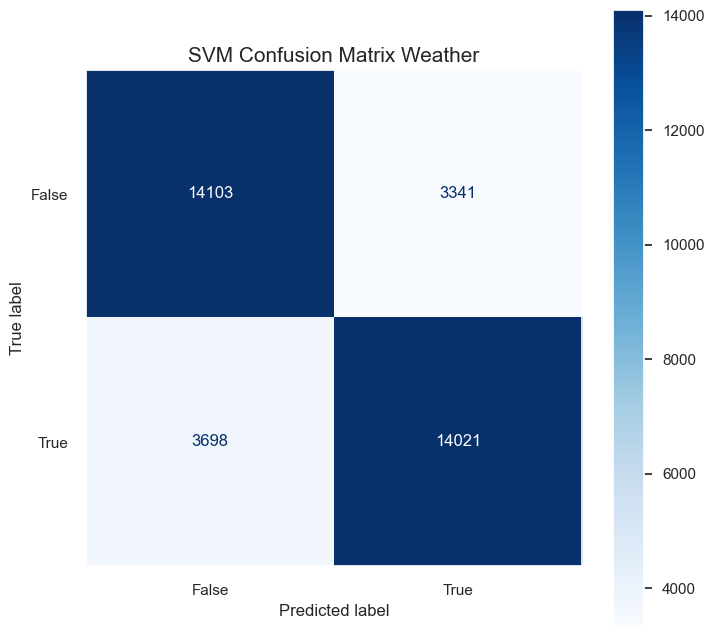

In [402]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cmatrix, display_labels = [False, True])
cm_display.plot(ax=ax, cmap='Blues')
ax.grid(False)
ax.set_title('SVM Confusion Matrix Weather', size=15)

plt.show()

In [403]:
print(f'Classification Report:\n{classification_report(yWeather_balanced_test, yWeather_balanced_svm_pred)}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80     17444
         1.0       0.81      0.79      0.80     17719

    accuracy                           0.80     35163
   macro avg       0.80      0.80      0.80     35163
weighted avg       0.80      0.80      0.80     35163



**Keterangan :** Sebelum dilakukan SMOTE, model SVM memiliki recall yang rendah pada kelas minoritas sebesar 0.46. Namun, setelah dilakukan SMOTE, recall pada kelas minoritas meningkat menjadi 0.79, menunjukkan bahwa model SVM menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar.

# **EVALUASI MODEL**

In [405]:
# Membandingkan MODEL
print(f'Logistic Regression Score:{metrics.accuracy_score(yWeather_balanced_test, yWeather_balanced_pred)}')
print(f'Support Vector Machine Score:{metrics.accuracy_score(yWeather_balanced_test, yWeather_balanced_svm_pred)}')  

Logistic Regression Score:0.7969456531012712
Support Vector Machine Score:0.7998179905013793


# **Kesimpulan**

1. Berdasarkan bar chart, prediksi bahwa hari esok tidak terjadi hujan lebih banyak dibandingkan prediksi bahwa hari esok terjadi hujan.
2. Berdasarkan heatmap, terjadi korelasi positif yang kuat antara variabel MaxTemp & Temp3pm, antara variabel Pressure9am & Pressure 3pm, dan antara variabel MinTemp & Temp9an. Sedangkan korelasi negatif terkuat terjadi antara variabel Humidity3pm & Temp3pm, antara variabel MaxTemp & Humidity9am, dan antara variabel Humidity9am & Temp3pm.
3. Pada project ini digunakan 2 algoritma model machine learning yang terdiri dari Logistic Regression dan Support Vector Machine.
4. Dilakukan proses handling imbalance data dengan SMOTE yang menghasilkan sebagai berikut :
    * Sebelum dilakukan SMOTE, model memiliki recall yang rendah pada kelas minoritas sebesar 0.50. Namun, setelah dilakukan SMOTE, recall pada kelas minoritas meningkat menjadi 0.79, menunjukkan bahwa model menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar.
    * Sebelum dilakukan SMOTE, model SVM memiliki recall yang rendah pada kelas minoritas sebesar 0.46. Namun, setelah dilakukan SMOTE, recall pada kelas minoritas meningkat menjadi 0.79, menunjukkan bahwa model SVM menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar.
4. Berdasarkan perbandingan nilai akurasi dari 2 algoritma model machine learning, model dengan nilai akurasi tertinggi adalah model SVM dengan nilai akurasi sebesar 0.79981. Sehingga algoritma yang paling sesuai untuk digunakan adalah Support Vektor Machine.